In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
7,3300,4,155.0
17,1540,3,60.0
18,2770,3,102.0
2,1440,3,62.0
15,1175,2,42.0


In [4]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    feature_number = X.shape[1]
    w = np.ones(shape=feature_number)
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T) + b

        w_grad=  -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad =  -(2/total_samples)*np.sum(y_true - y_predicted)

        w -= learning_rate*w_grad
        b -= learning_rate*b_grad
        cost  = np.mean(np.square(y_true - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

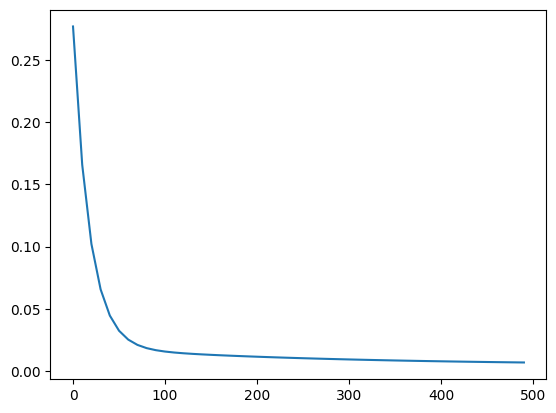

In [7]:
plt.plot(epoch_list, cost_list)

In [8]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate= 0.01):
    feature_number = X.shape[1]
    w = np.ones(shape=feature_number)
    b = 0
    total_samples =  X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad=  -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad =  -(2/total_samples)*np.sum(y_true - y_predicted)

        w -= learning_rate*w_grad
        b -= learning_rate*b_grad
        cost = np.square(sample_y - y_predicted)

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)


(array([1.63567848, 1.31565596]),
 -0.7577554869716411,
 0.12404093509772966,
 [0.18498787761646346,
  0.021491448323877983,
  0.11337888153129211,
  0.003274301768335996,
  0.16943889257162836],
 [0, 100, 200, 300, 400])